In [16]:
import os
import polars as pl
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Import Dataset

In [17]:
local_path='dataset/'
file_input='gdp_evol_df.csv'
auto='auto'

In [18]:
# get current directory
path = os.getcwd()
print("Current Directory", path)
print()
 
# parent directory
parent = os.path.dirname(path)
print("Parent directory", parent)
print()

# auto path
path_auto=os.path.join(parent,auto)
print("Dump path",path_auto)
print()

# country code dataset path
dataset_path=os.path.join(path_auto,file_input)
print("Dataset path",dataset_path)


Current Directory /Users/baptistebeaurain/Google Drive/learning/Python/polars_explo/project/gdp/notebook

Parent directory /Users/baptistebeaurain/Google Drive/learning/Python/polars_explo/project/gdp

Dump path /Users/baptistebeaurain/Google Drive/learning/Python/polars_explo/project/gdp/auto

Dataset path /Users/baptistebeaurain/Google Drive/learning/Python/polars_explo/project/gdp/auto/gdp_evol_df.csv


In [19]:
df=pd.read_csv(dataset_path)

print("shape:", df.shape)

df.head(5)

shape: (11251, 9)


,cty_name,cty_code,year,gdp,prev_gdp,prev_year,gdp_evol,nb_year,gdp_evol_percent
0,Aruba,ABW,1995,1.320670e+09,1.330168e+09,1994,0.992860,1,-0.713986
1,Aruba,ABW,1996,1.379888e+09,1.320670e+09,1995,1.044839,1,4.483926
2,Aruba,ABW,1997,1.531844e+09,1.379888e+09,1996,1.110121,1,11.012146
3,Aruba,ABW,1998,1.665363e+09,1.531844e+09,1997,1.087163,1,8.716265
4,Aruba,ABW,1999,1.722799e+09,1.665363e+09,1998,1.034488,1,3.448843


## Keep France, Germany, and UK only

In [20]:
list_country=['FRA','DEU','GBR']

df_analysis=df[df['cty_code'].isin(list_country)]

df_analysis.head()

,cty_name,cty_code,year,gdp,prev_gdp,prev_year,gdp_evol,nb_year,gdp_evol_percent
2250,Germany,DEU,1971,2.490392e+11,2.150218e+11,1970,1.158204,1,15.820447
2251,Germany,DEU,1972,2.986672e+11,2.490392e+11,1971,1.199278,1,19.927786
2252,Germany,DEU,1973,3.968667e+11,2.986672e+11,1972,1.328792,1,32.879244
2253,Germany,DEU,1974,4.436186e+11,3.968667e+11,1973,1.117803,1,11.780252
2254,Germany,DEU,1975,4.887802e+11,4.436186e+11,1974,1.101803,1,10.180256


/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/homebrew/lib/python3

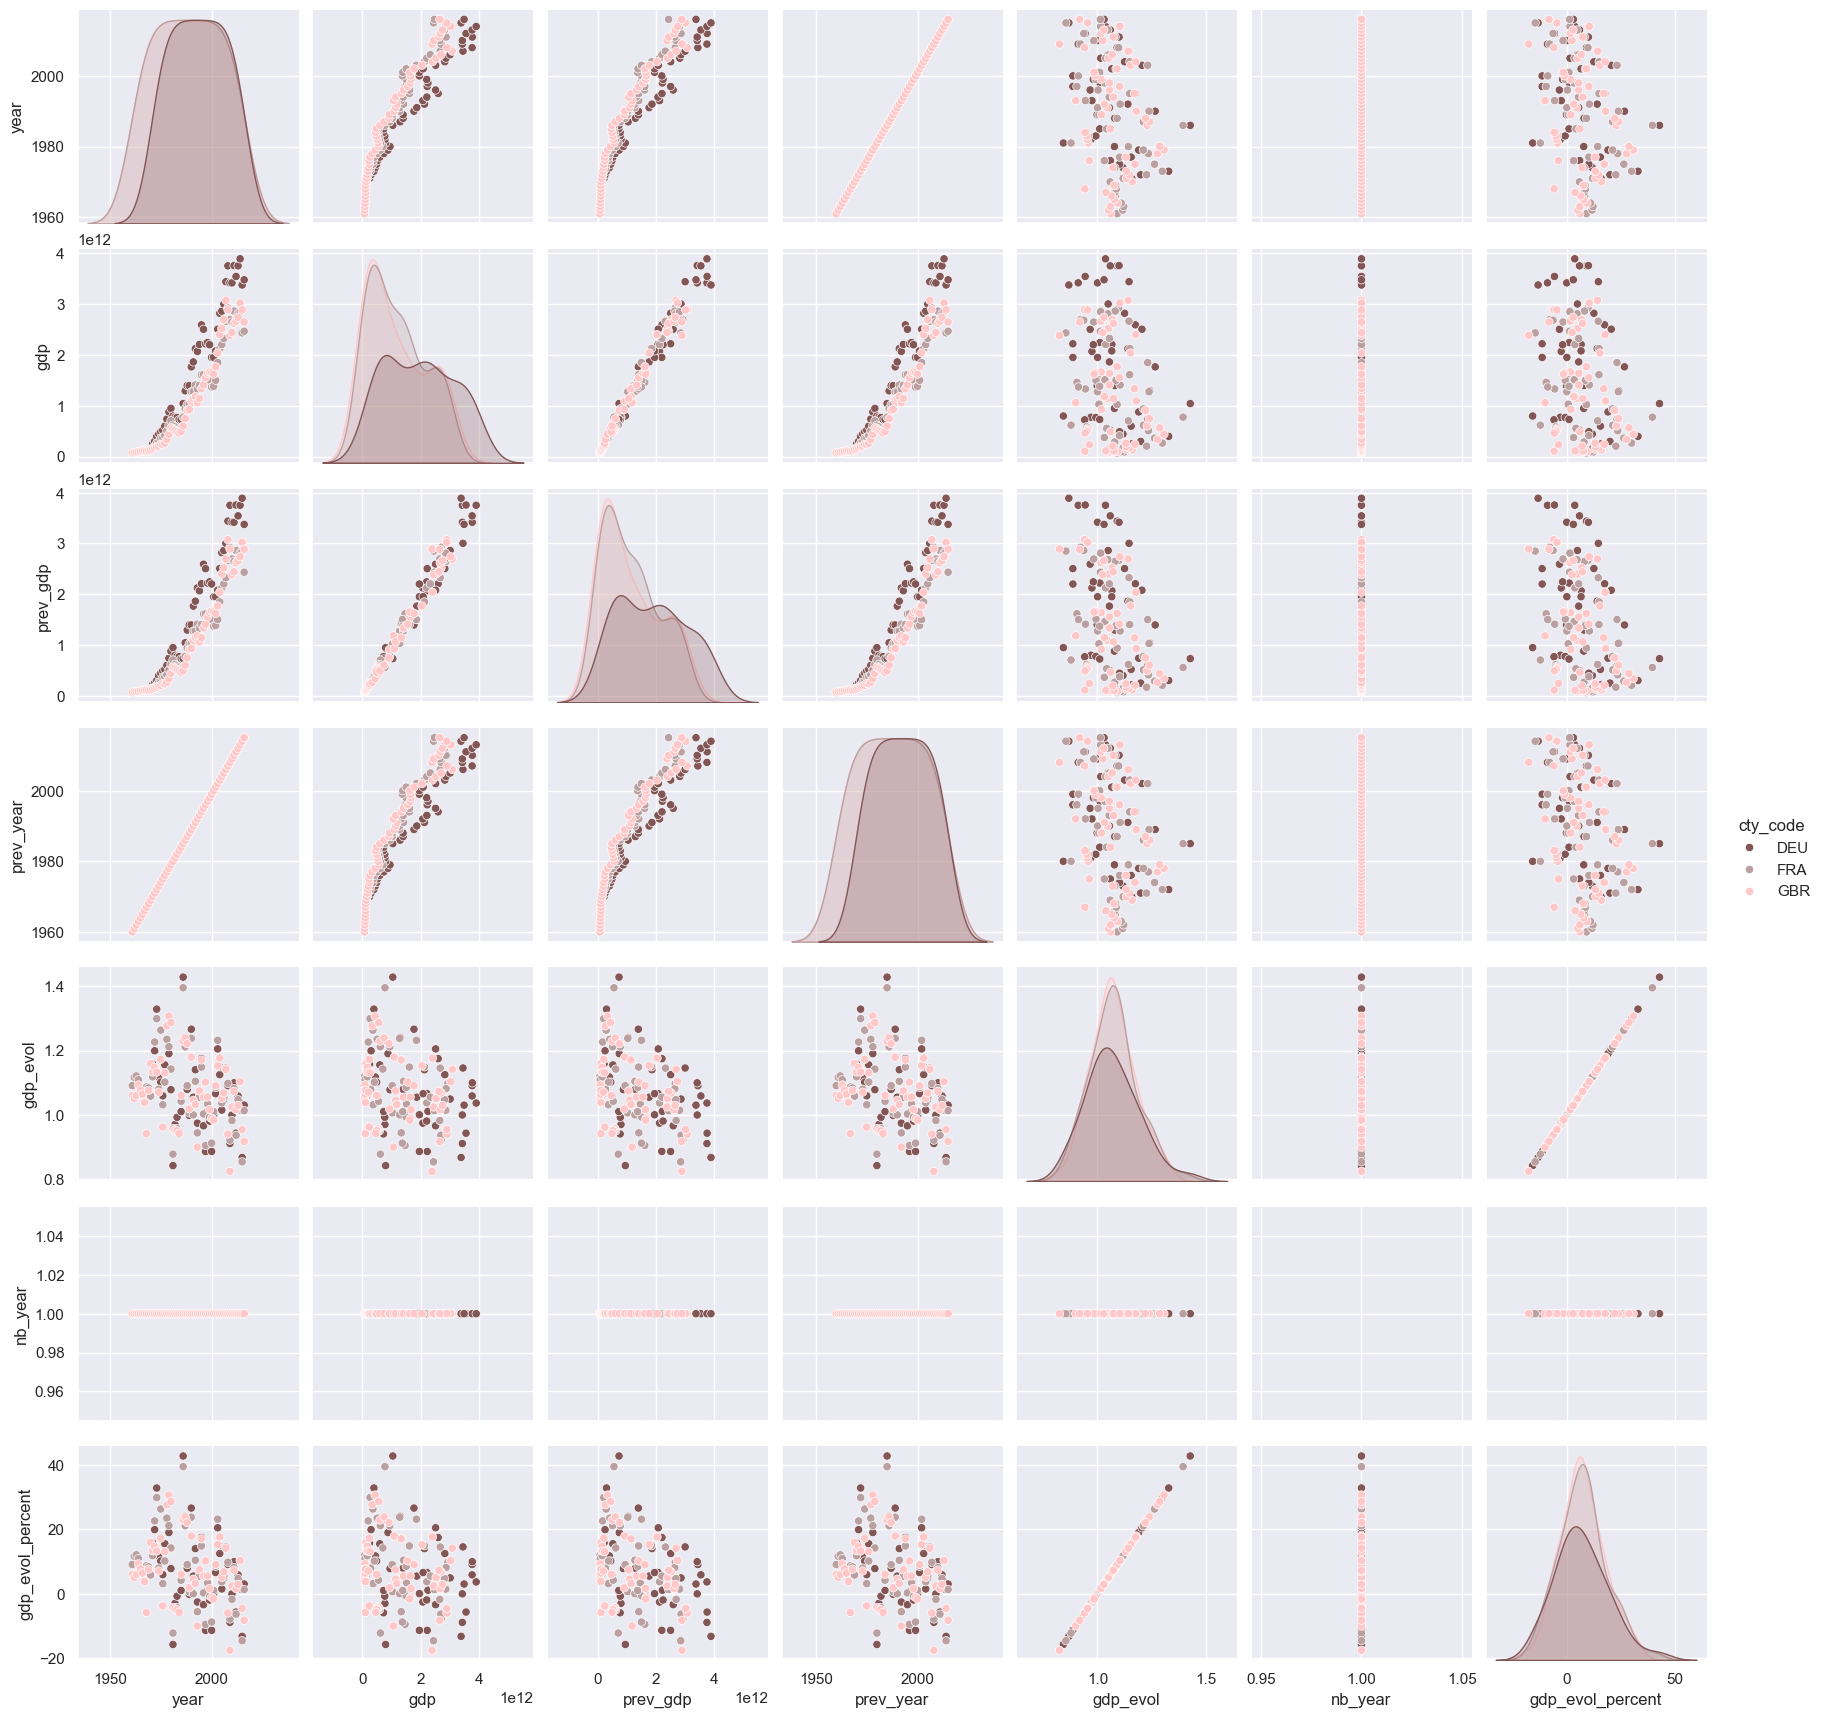

In [21]:
#Let's have a look at data 
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(df_analysis, hue= "cty_code",palette=shade)# I chose "cut" as hue. We can also examine other attributes in hue with less value count. 


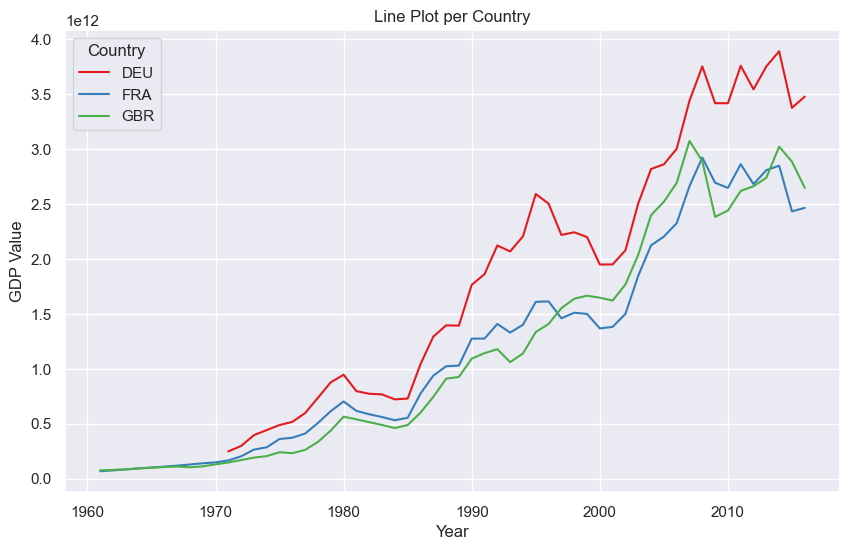

In [22]:
# Set the style for seaborn (optional)
sns.set(style="darkgrid")

# Use Seaborn to create a lineplot for each group
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='gdp', hue='cty_code', data=df_analysis, palette='Set1')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('GDP Value')
plt.title('Line Plot per Country')

# Show the legend
plt.legend(title='Country')

# Show the plot
plt.show()

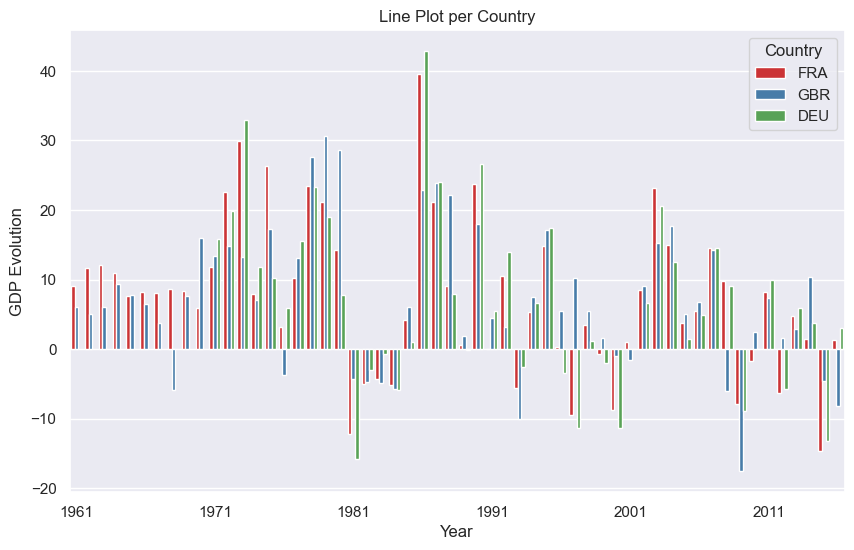

In [23]:
# Set the style for seaborn (optional)
sns.set(style="darkgrid")

# Use Seaborn to create a lineplot for each group
plt.figure(figsize=(10, 6))
bar_plot =sns.barplot(x='year', y='gdp_evol_percent', hue='cty_code', data=df_analysis, palette='Set1')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('GDP Evolution')
plt.title('Line Plot per Country')

# Show the legend
plt.legend(title='Country')

for index, label in enumerate(bar_plot.get_xticklabels()):
   if index % 10== 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
plt.show()


# Show the plot
plt.show()